In [4]:
"""
@author: Rhoenigman
         Shivendra
"""
import networkx as nx
import numpy as np
import sys

"""
The function to generate the input graph

:return: Returns the NetworkX Graph for Q2
"""
def Question2():
    # Create a directed graph
    G = nx.DiGraph()

    # The 'length' on each edge should be ignored and is only for drawing.
    # Adding an edge also adds the node
    G.add_edge('EC', 'A', length=40, weight=1.0)
    G.add_edge('EC', 'H', length=40, weight=1.0)
    G.add_edge('EC', 'J', length=60, weight=1.0)

    G.add_edge('H', 'G', length=40, weight=1.0)
    G.add_edge('H', 'K', length=40, weight=1.0)

    G.add_edge('G', 'L', length=40, weight=1.0)
    G.add_edge('G', 'F', length=40, weight=1.0)

    G.add_edge('F', 'E', length=40, weight=1.0)

    G.add_edge('E', 'HUMN', length=40, weight=1.0)

    G.add_edge('J', 'S', length=80, weight=1.0)
    G.add_edge('J', 'K', length=60, weight=1.0)

    G.add_edge('K', 'L', length=40, weight=1.0)
    G.add_edge('L', 'M', length=40, weight=1.0)
    G.add_edge('M', 'N', length=40, weight=1.0)
    G.add_edge('M', 'F', length=60, weight=1.0)

    G.add_edge('N', 'O', length=80, weight=1.0)
    G.add_edge('N', 'E', length=80, weight=1.0)

    G.add_edge('O', 'HUMN', length=40, weight=1.0)

    G.add_edge('A', 'S', length=60, weight=1.0)
    G.add_edge('A', 'B', length=40, weight=1.0)

    G.add_edge('B', 'R', length=40, weight=1.0)
    G.add_edge('B', 'C', length=40, weight=1.0)

    G.add_edge('S', 'R', length=60, weight=1.0)
    G.add_edge('R', 'Q', length=40, weight=1.0)

    G.add_edge('Q', 'C', length=40, weight=1.0)
    G.add_edge('Q', 'P', length=60, weight=1.0)

    G.add_edge('C', 'D', length=40, weight=1.0)
    G.add_edge('D', 'HUMN', length=40, weight=1.0)
    G.add_edge('P', 'D', length=40, weight=1.0)
    G.add_edge('P', 'O', length=60, weight=1.0)
    G.add_edge('O', 'HUMN', length=40, weight=1.0)

    G.add_edge('T', 'Q', length=40, weight=1.0)
    G.add_edge('T', 'P', length=40, weight=1.0)
    G.add_edge('T', 'O', length=40, weight=1.0)
    G.add_edge('T', 'N', length=40, weight=1.0)
    G.add_edge('T', 'M', length=40, weight=1.0)

    G.add_edge('R', 'T', length=40, weight=1.0)
    G.add_edge('S', 'T', length=40, weight=1.0)
    G.add_edge('J', 'T', length=40, weight=1.0)
    G.add_edge('K', 'T', length=40, weight=1.0)
    G.add_edge('L', 'T', length=40, weight=1.0)

    return G

In [4]:
"""
A utility function to help visualize the generated graph

:param G: NetworkX Graph
:return: None (instead saves the input graph in .png format)
"""
def draw_graph(G):
    import matplotlib.pyplot as plt
    import pylab
    edge_labels = dict([((u, v,), d['weight'])
                        for u, v, d in G.edges(data=True)])
    node_labels = {node: node for node in G.nodes()}

    pos = nx.spectral_layout(G)
    nx.draw_networkx_labels(G, pos, labels=node_labels)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
    nx.draw(G, pos, node_size=500, edge_cmap=plt.cm.Reds)
    plt.savefig('Finals_Q2_Graph.png')
    pylab.title("Input Graph")
    pylab.show()

In [23]:
#graph is the actual graph created
#V = number of verticies in the graph
def Matrix(graph):
    A = nx.adjacency_matrix(graph).todense()
    return A

In [31]:
def getPosition(nodes, node):
    V = len(nodes)
    for i in range(V):
        if(nodes[i] == node):
            return i

In [91]:
def shortestPath(matrix, graph, start, end, k):
    V = len(graph)
    INF = float('inf')
    #replace edges with stops
    
    store = [[None]*V for i in range(V)]
        
    for i in range(V):
        for j in range(V):
            store[i][j] = [None] * (k+1)
    
    for stops in range(k+1):
        for source in range(V):
            for dest in range(V):
                store[source][dest][stops] = INF
                
                if(source == dest): #there does not exist a edge or the source and destingation are the same
                    store[source][dest][stops] = 0 #there is no edge weight value
                    
                #if there exists NO stops, there is only one edge and there is a connection b/w the two nodes
                elif(stops == 0 and matrix[source][dest] == 1):
                    weight = graph[source][dest]["weight"] #get the weight b/w the two edges
                    store[source][dest][stops] = weight #store that weight in the array
                    
                elif(stops >= 1):
                    #consider all the adjacentNodes by checking the matrix 
                    for adjNode in range(V):
                        #if there is a connection between the source and the other node,
                        if(matrix[source][adjNodes] != 0 and 
                           source != adjNode and dest != adjNode and #neither the source or the destination can be one of these nodes
                           store[adjNode][dest][stops - 1] != INF):
                            store[source][dest][stops] = min(store[source][dest][stops], graph[source][adjNode]["weight"] + store[adjNode][dest][stops - 1])    
    
    print(store[start][end][k]) #this will give the total weight of the path, not the path
    
    #BACKTRACK and store nodes in array
    path = []
    #starting Position
    startPosition = store[start][end][k]
    
    #backtrack and append the path[]
    #flip the path, to get the final shortest path

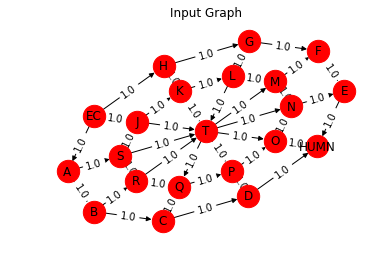

[[0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0.]
 [0. 0. 0.

IndexError: index 1 is out of bounds for axis 0 with size 1

In [93]:
def main():
    ################## READ CAREFULLY ##############################

    # Note that you cannot use any networkx functionality
    # which makes the solution trivial

    # The 'length' on each edge (while generating the graph)
    # should be ignored and is only for drawing.
    # You should consider the 'weight' for finding the smallest path.
    # The above example has weights 1 but the weight can be anything.
    # Later on we may post some more graphs for testing.
    G = Question2()
    draw_graph(G)
    V = len(G)
    
    # Call your function here that takes in the Graph "G"
    # and returns the shortest path
    # (note that it is not the length but the entire path)
    
    adj = Matrix(G)
    print(adj, "\n")
    
    #Create 3D array that holds the path and weight. Stops at e edges (k - 2)
    shortestPath(adj, G, 0, 9, 5)
    

if __name__ == "__main__":
    # The driver function
    main()